In [ ]:
import ee
import geemap
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:
!pip install xee
import xee


In [ ]:
ee.Authenticate()
ee.Initialize(project = 'ee-bastolashristi', opt_url = 'https://earthengine-highvolume.googleapis.com')

In [ ]:
map = geemap.Map(basemap = 'SATELLITE', ee_initialize=False)
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
roi = map.draw_last_feature.geometry()
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          79.859985,
                          26.244088
                        ],
                        [
                          79.859985,
                          30.410716
                        ],
                        [
                          87.782421,
                          30.410716
                        ],
                        [
                          87.782421,
                          26.244088
                        ],
                        [
                          79.859985,
                          26.244088
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [ ]:
ndvi = ee.ImageCollection("NOAA/CDR/VIIRS/NDVI/V1").select('NDVI','QA').filterDate('2023','2024')
ndvi

In [ ]:
def cloud_mask(img):
  ndvi_img = img.select('NDVI').multiply(0.0001)
  qa_img = img.select('QA')
  cloud = qa_img.bitwiseAnd(1 << 1).neq(0)
  shadow = qa_img.bitwiseAnd(1 << 2).neq(0)
  mask = cloud.Or(shadow).Not()
  return ndvi_img.updateMask(mask).copyProperties(img, img.propertyNames())

ndvi_mask = ndvi.map(cloud_mask)
ndvi_mask

In [ ]:
ds = xr.open_dataset(ndvi_mask, engine = 'ee', crs = 'EPSG:4326', scale = 0.1, geometry = roi)


In [ ]:
ds

<xarray.Dataset> Size: 5MB
Dimensions:  (time: 364, lon: 79, lat: 42)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
  * lon      (lon) float64 632B 79.91 80.01 80.11 80.21 ... 87.51 87.61 87.71
  * lat      (lat) float64 336B 26.29 26.39 26.49 26.59 ... 30.19 30.29 30.39
Data variables:
    NDVI     (time, lon, lat) float32 5MB ...
Attributes:
    crs:      EPSG:4326

In [ ]:
monthly = ds.resample(time = 'M').mean('time')

In [ ]:
monthly

<xarray.Dataset> Size: 160kB
Dimensions:  (time: 12, lon: 79, lat: 42)
Coordinates:
  * time     (time) datetime64[ns] 96B 2023-01-31 2023-02-28 ... 2023-12-31
  * lon      (lon) float64 632B 79.91 80.01 80.11 80.21 ... 87.51 87.61 87.71
  * lat      (lat) float64 336B 26.29 26.39 26.49 26.59 ... 30.19 30.29 30.39
Data variables:
    NDVI     (time, lon, lat) float32 159kB 0.621 0.5941 ... 0.1133 0.06134
Attributes:
    crs:      EPSG:4326

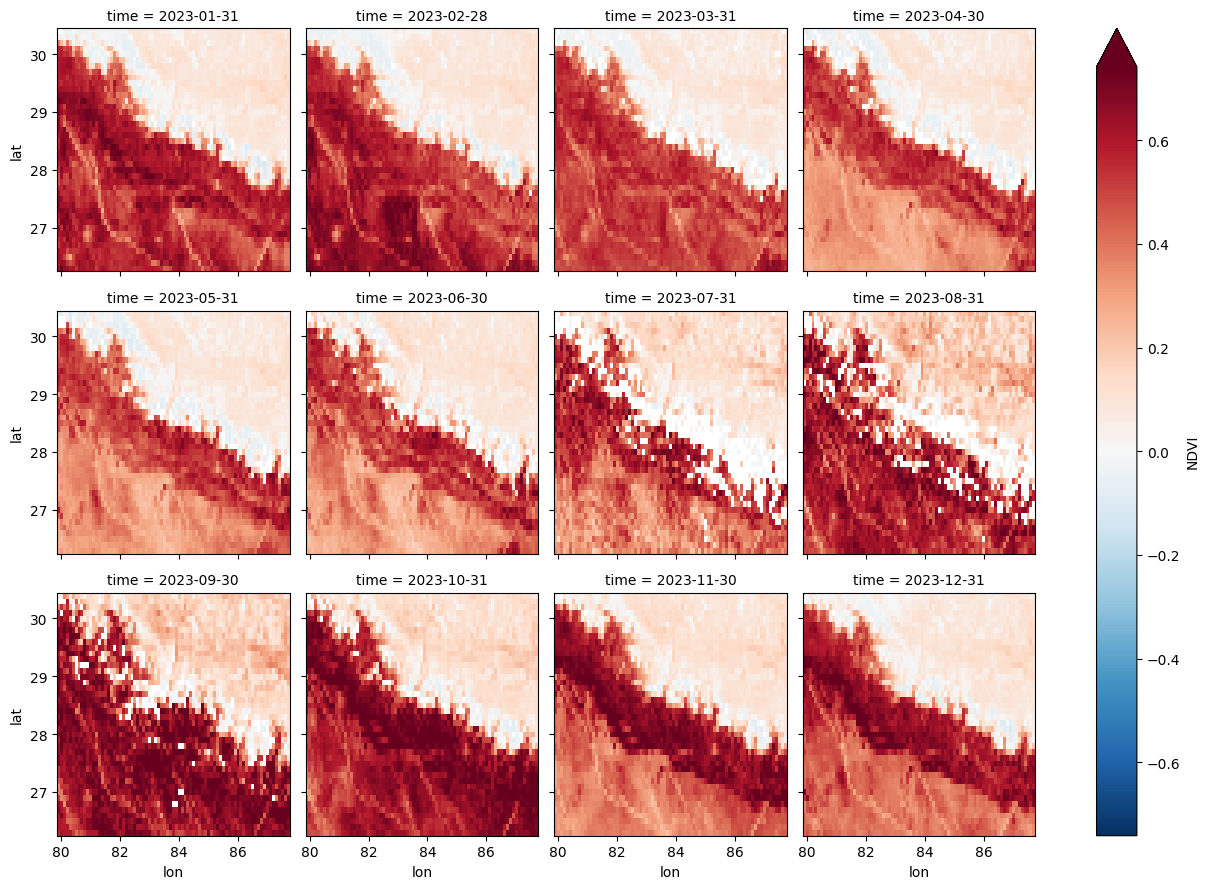

In [ ]:
monthly.NDVI.plot(x = 'lon', y = 'lat', col = 'time', col_wrap =4, robust =True)

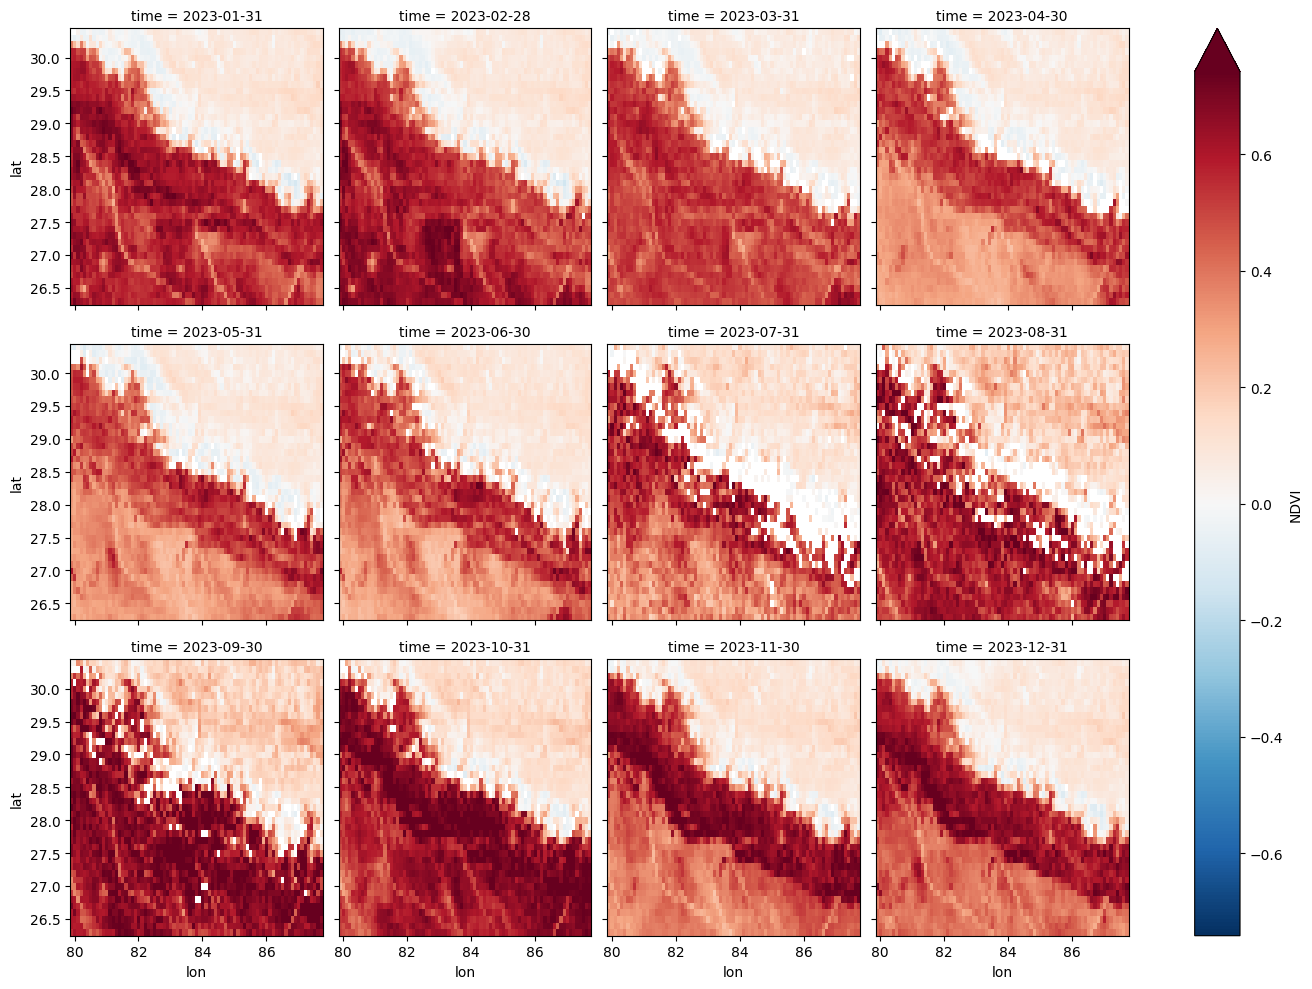

In [ ]:
import matplotlib.pyplot as plt

p = monthly.NDVI.plot(
    x='lon',
    y='lat',
    col='time',
    col_wrap=4,
    robust=True,
    figsize=(14, 10)
)

# Get the figure created by xarray
fig = plt.gcf()

fig.savefig("monthly_NDVI.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
from google.colab import files
files.download("monthly_NDVI.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install netCDF4
import netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.7 MB/s eta 0:00:00


In [ ]:
ds.to_netcdf('ndvi_daily.nc', engine='scipy')
print("Dataset saved to ndvi_daily.nc successfully using 'scipy' engine.")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
!pip install dea_tools

In [ ]:
import dea_tools.temporal

In [ ]:
!pip install netCDF4
import netCDF4

In [ ]:
import xarray as xr

In [ ]:
ds = xr.open_dataset('ndvi_daily.nc')
print("Dataset opened successfully.")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/ndvi_daily.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
!rm -f ndvi_daily.nc
print("Removed existing ndvi_daily.nc (if any).")

Removed existing ndvi_daily.nc (if any).


In [ ]:
for var_name in ds.variables:
    if 'bounds' in ds[var_name].attrs:
        del ds[var_name].attrs['bounds']
ds.to_netcdf('ndvi_daily.nc', engine='scipy')
print("Dataset saved to ndvi_daily.nc successfully using 'scipy' engine.")

Dataset saved to ndvi_daily.nc successfully using 'scipy' engine.


In [ ]:
import xarray as xr
ds = xr.open_dataset('ndvi_daily.nc')
print("Dataset opened successfully.")
ds

Dataset opened successfully.


<xarray.Dataset> Size: 5MB
Dimensions:  (time: 364, lon: 79, lat: 42)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
  * lon      (lon) float64 632B 79.91 80.01 80.11 80.21 ... 87.51 87.61 87.71
  * lat      (lat) float64 336B 26.29 26.39 26.49 26.59 ... 30.19 30.29 30.39
Data variables:
    NDVI     (time, lon, lat) float32 5MB ...
Attributes:
    crs:      EPSG:4326

In [ ]:
phenology = dea_tools.temporal.xr_phenology(
    ds.NDVI,
    stats=['SOS', 'POS', 'EOS', 'Trough', 'vSOS', 'vPOS', 'vEOS', 'LOS', 'AOS', 'ROG', 'ROS'], method_sos='first', method_eos='last', verbose=True
)

      Phenology...
         POS
         EOS
         Trough
         vSOS
         vPOS
         vEOS
         LOS
         AOS
         ROG
         ROS


In [ ]:
phenology

<xarray.Dataset> Size: 120kB
Dimensions:  (lon: 79, lat: 42)
Coordinates:
  * lon      (lon) float64 632B 79.91 80.01 80.11 80.21 ... 87.51 87.61 87.71
  * lat      (lat) float64 336B 26.29 26.39 26.49 26.59 ... 30.19 30.29 30.39
Data variables:
    SOS      (lon, lat) int16 7kB 14 14 16 6 201 6 27 ... 43 128 126 42 34 126
    POS      (lon, lat) int16 7kB 33 33 33 33 272 33 ... 234 242 259 259 259 238
    EOS      (lon, lat) int16 7kB 194 194 179 169 324 ... 293 341 339 313 340
    Trough   (lon, lat) float32 13kB -0.0133 -0.0157 0.1581 ... 0.0282 -0.0058
    vSOS     (lon, lat) float32 13kB 0.4455 0.4127 0.6473 ... 0.0542 0.0619
    vPOS     (lon, lat) float32 13kB 0.7122 0.7022 0.7466 ... 0.2604 0.1885
    vEOS     (lon, lat) float32 13kB -0.0133 -0.0157 0.1581 ... 0.0694 -0.0047
    LOS      (lon, lat) int16 7kB 180 180 163 163 123 ... 165 215 297 279 214
    AOS      (lon, lat) float32 13kB 0.7255 0.7179 0.5885 ... 0.2322 0.1943
    ROG      (lon, lat) float32 13kB 0.01404 0.01524 ... 0.0009164 0.00113
    ROS      (lon, lat) float32 13kB -0.004506 -0.004459 ... -0.003537 -0.001894

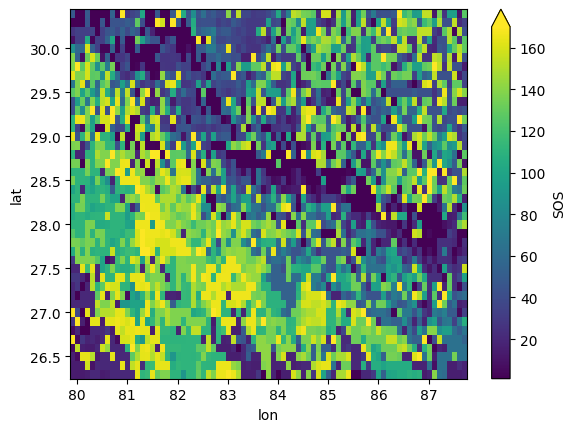

In [ ]:
phenology.SOS.plot(x = 'lon', y = 'lat', robust = True)

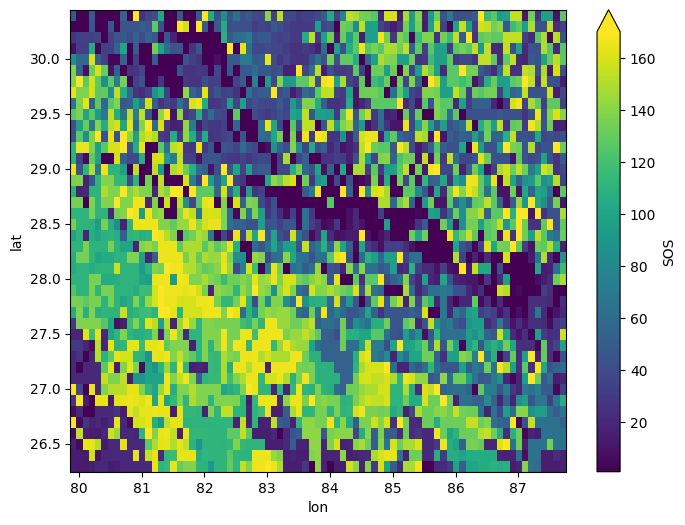

In [ ]:
import matplotlib.pyplot as plt

phenology.SOS.plot(
    x='lon',
    y='lat',
    robust=True,
    figsize=(8, 6)
)

# Capture the figure created by xarray
fig = plt.gcf()

fig.savefig("SOS_map.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
from google.colab import files
files.download("SOS_map.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

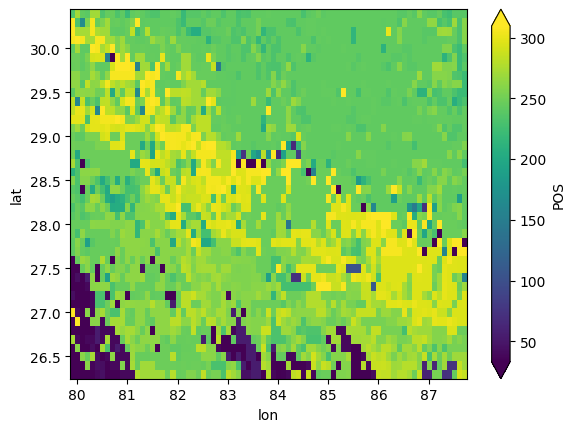

In [ ]:
phenology.POS.plot(x = 'lon', y = 'lat', robust = True)

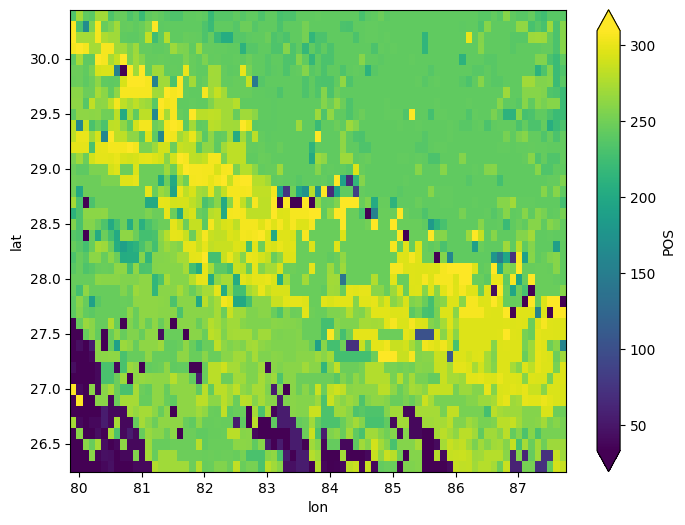

In [ ]:
import matplotlib.pyplot as plt

phenology.POS.plot(
    x='lon',
    y='lat',
    robust=True,
    figsize=(8, 6)
)

# Capture the figure created by xarray
fig = plt.gcf()

fig.savefig("POS_map.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
from google.colab import files
files.download("POS_map.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

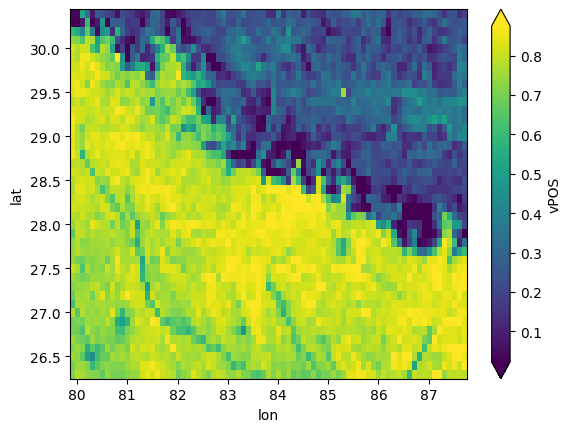

In [ ]:
phenology.vPOS.plot(x = 'lon', y = 'lat', robust = True)

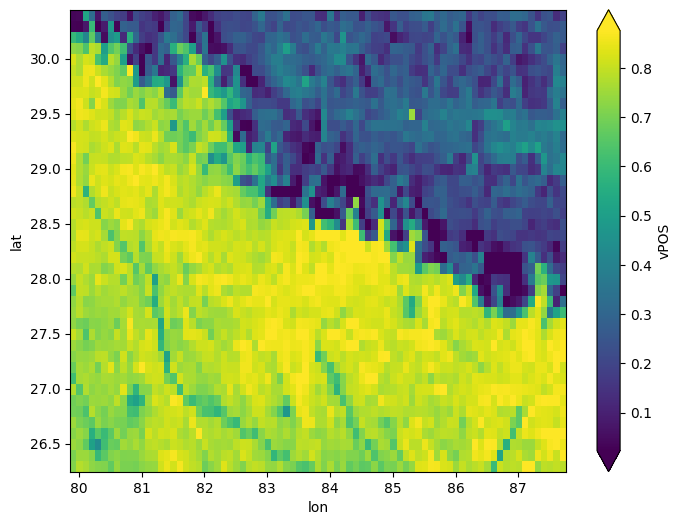

In [ ]:
import matplotlib.pyplot as plt

phenology.vPOS.plot(
    x='lon',
    y='lat',
    robust=True,
    figsize=(8, 6)
)

# Capture the figure created by xarray
fig = plt.gcf()

fig.savefig("vPOS_map.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
from google.colab import files
files.download("vPOS_map.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

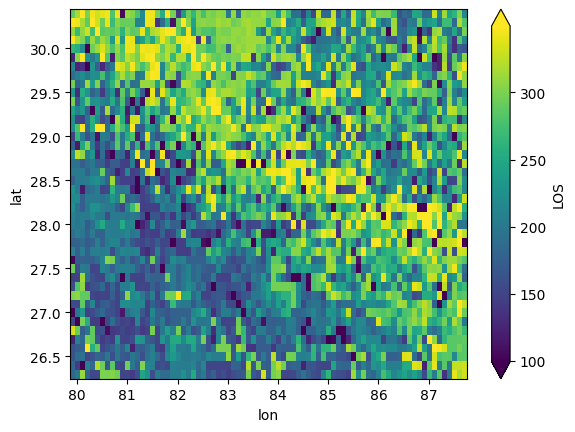

In [ ]:
phenology.LOS.plot(x = 'lon', y = 'lat', robust = True)

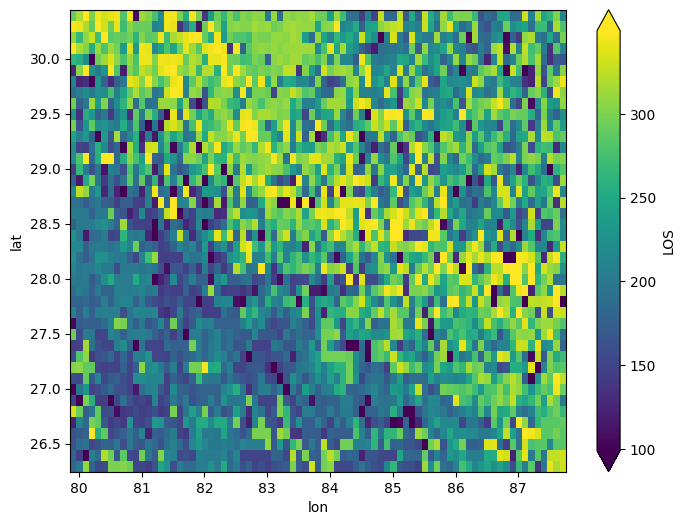

In [ ]:
import matplotlib.pyplot as plt

phenology.LOS.plot(
    x='lon',
    y='lat',
    robust=True,
    figsize=(8, 6)
)

# Capture the figure created by xarray
fig = plt.gcf()

fig.savefig("LOS_map.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
from google.colab import files
files.download("LOS_map.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>